In [2]:
import numpy as np
import pandas as pd
!pip install scikit-learn==0.22
!pip install six
from six import StringIO
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from google.colab import files
upload = files.upload()
import io
data = pd.read_csv(io.BytesIO(upload['buy_computer.csv']))
value=['Age','Income','Student','Credit_Rating']
data


Saving buy_computer.csv to buy_computer (1).csv


,Age,Income,Student,Credit Rating,Class
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle-aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle-aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [7]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()  
data=data.apply(string_to_int.fit_transform)
data


,Age,Income,Student,Credit Rating,Class
0,2,0,0,1,0
1,2,0,0,0,0
2,0,0,0,1,1
3,1,2,0,1,1
4,1,1,1,1,1
5,1,1,1,0,0
6,0,1,1,0,1
7,2,2,0,1,0
8,2,1,1,1,1
9,1,2,1,1,1


In [10]:
feature_cols = ['Age','Income','Student','Credit Rating']
X = data[feature_cols]                               
y = data.Class
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 


In [12]:
#pelatihan
from sklearn.tree import DecisionTreeClassifier                             
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)  
classifier.fit(X_train, y_train)

#prediksi
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, presort='deprecated',
random_state=100, splitter='best') 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [13]:
y_pred= classifier.predict(X_test)  
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))


Accuracy: 0.75
[[0 0]
 [1 3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86         4

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


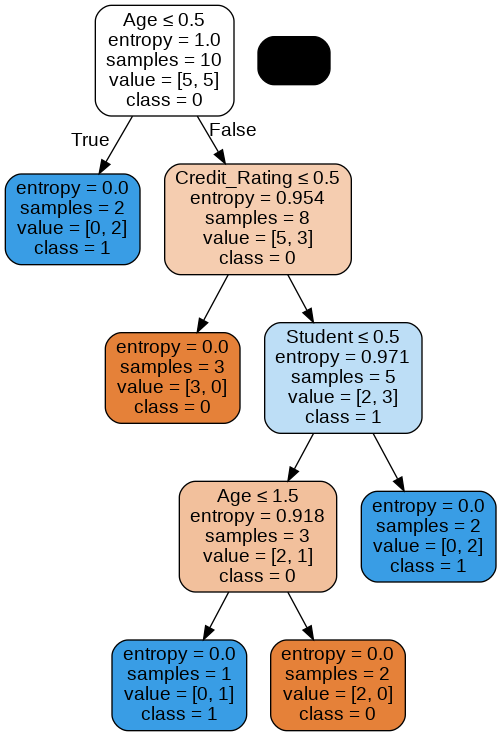

In [14]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from six import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())
